### HOMEWORK 6 - DENSITY MATRICES ###

# Density Matrices

Consider a quantum system composed of $ N $ subsystems (spins, atoms, particles, etc.) each described by a wave function $ \psi_i \in \mathcal{H}_D $, where $ \mathcal{H}_D $ is a $ D $-dimensional Hilbert space. How do you write the total wave function of the system $ \Psi(\psi_1, \psi_2, \ldots, \psi_N) $?

## Tasks

1. **Write Code**  
   (a) Write a code (in Fortran or Python) to describe the composite system in the case of an $ N $-body non-interacting, separable pure state.  
   (b) Write a code for the case of a general $ N $-body pure wave function $ \Psi \in \mathcal{H}_{D^N} $.  

2. **Efficiency**  
   (c) Comment on and compare the efficiency of the implementations for parts (a) and (b).  

3. **Density Matrix**  
   (d) Given $ N = 2 $, write the density matrix of a general pure state $ \Psi $:  
   $$
   \rho = |\Psi\rangle\langle\Psi|
   $$  

4. **Reduced Density Matrix**  
   (e) Given a generic density matrix of dimension $ D^N \times D^N $, compute the reduced density matrix of either the left or the right system, e.g.,  
   $$
   \rho_1 = \text{Tr}_2 \rho
   $$  

5. **Testing**  
   (f) Test the functions described in parts (a)–(e) (and all necessary functions) on a two-spin one-half system (qubits) with different states.


In [1]:
## IMPORTS
import aux  # generic auxiliary functions
import density_matrix_functions as dm   # utility functions for this task
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the seed for reproducibility
np.random.seed(11111) # seed: 12345

## Points 1,2,3 ##

In [2]:
# Testing the functions's efficiency and performance
N = 4
D = 50

sep = dm.separable_state(N,D,verb=1)

print('------------------\n SEPARABLE STATE')
print(sep)

gen = dm.general_state(N,D, verb=1)

print('------------------\n GENERAL STATE')
print(gen)
print(np.linalg.norm(gen))

--------------------
COMPLEXITY ANALYSIS
---------------------
D = 50
N = 4
COMPLEXITY = 392
COMPUTATION TIME = 0.04562640190124512 s
MEMORY ALLOCATED = 100.000112 Mb
------------------
 SEPARABLE STATE
[-0.00080609-2.75772305e-04j -0.00041786+6.63414547e-05j
 -0.00055157-5.22095903e-06j ... -0.00064224+3.72393105e-04j
 -0.00057368-2.46046172e-04j -0.00067935-1.69586851e-04j]
--------------------
COMPLEXITY ANALYSIS
---------------------
D = 50
N = 4
COMPLEXITY = 12499996
COMPUTATION TIME = 0.3325648307800293 s
MEMORY ALLOCATED = 200.000112 Mb
------------------
 GENERAL STATE
[2.70455264e-04+4.27531051e-04j 9.33084718e-05+3.51502874e-05j
 1.74788955e-04+1.29599490e-04j ... 3.46158253e-04+3.14872001e-04j
 2.33336340e-04+6.72427197e-05j 3.46938417e-04+1.52242381e-04j]
0.9999999999999997


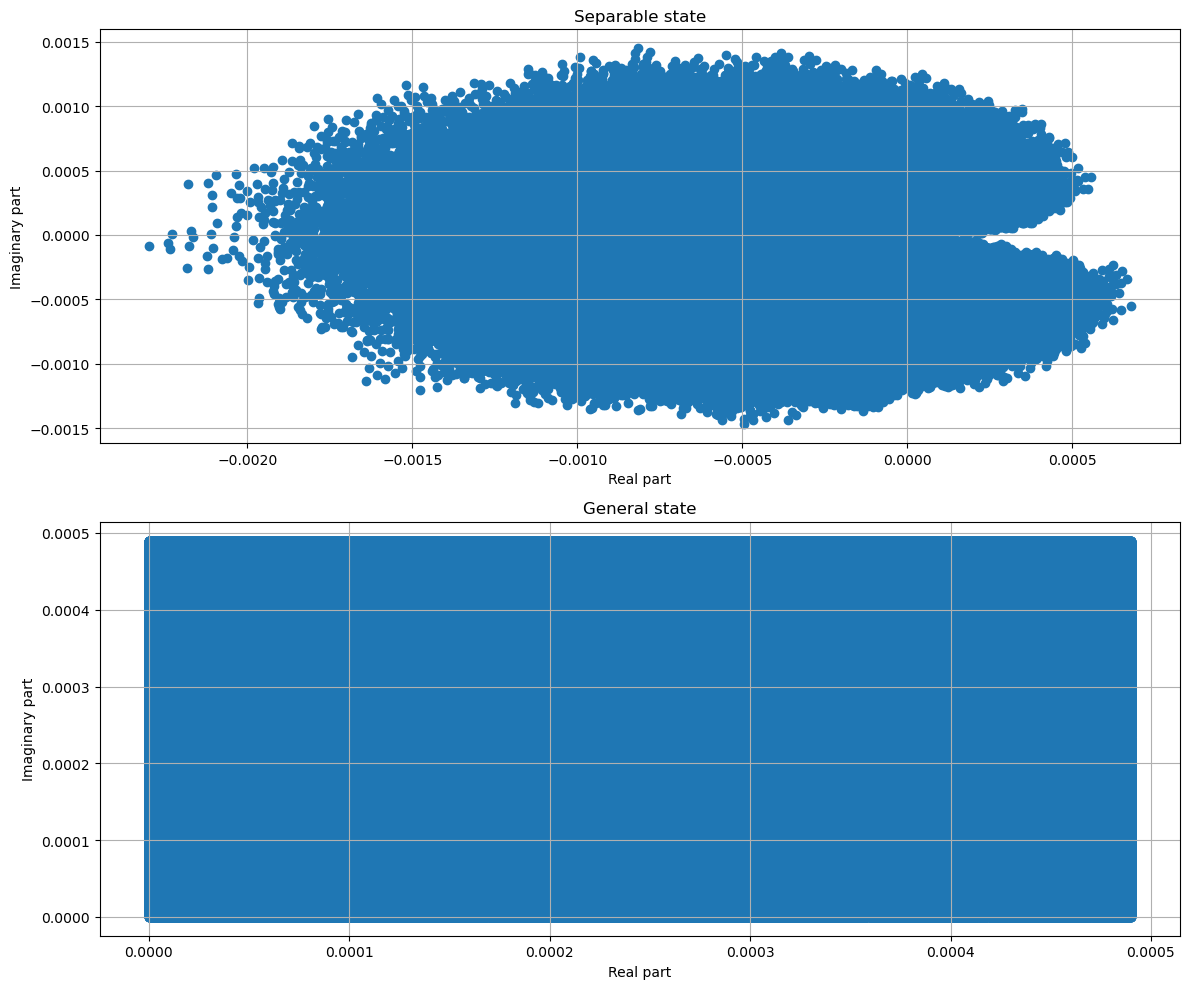

In [3]:
fig,ax = plt.subplots(2,1, figsize=(12,10))
ax[0].scatter(sep.real, sep.imag)
ax[0].set_xlabel('Real part')
ax[0].set_ylabel('Imaginary part')
ax[0].set_title('Separable state')
ax[0].grid()

ax[1].scatter(gen.real, gen.imag)
ax[1].set_xlabel('Real part')
ax[1].set_ylabel('Imaginary part')
ax[1].set_title('General state')
ax[1].grid()

plt.tight_layout()
plt.show()

(3, 100)


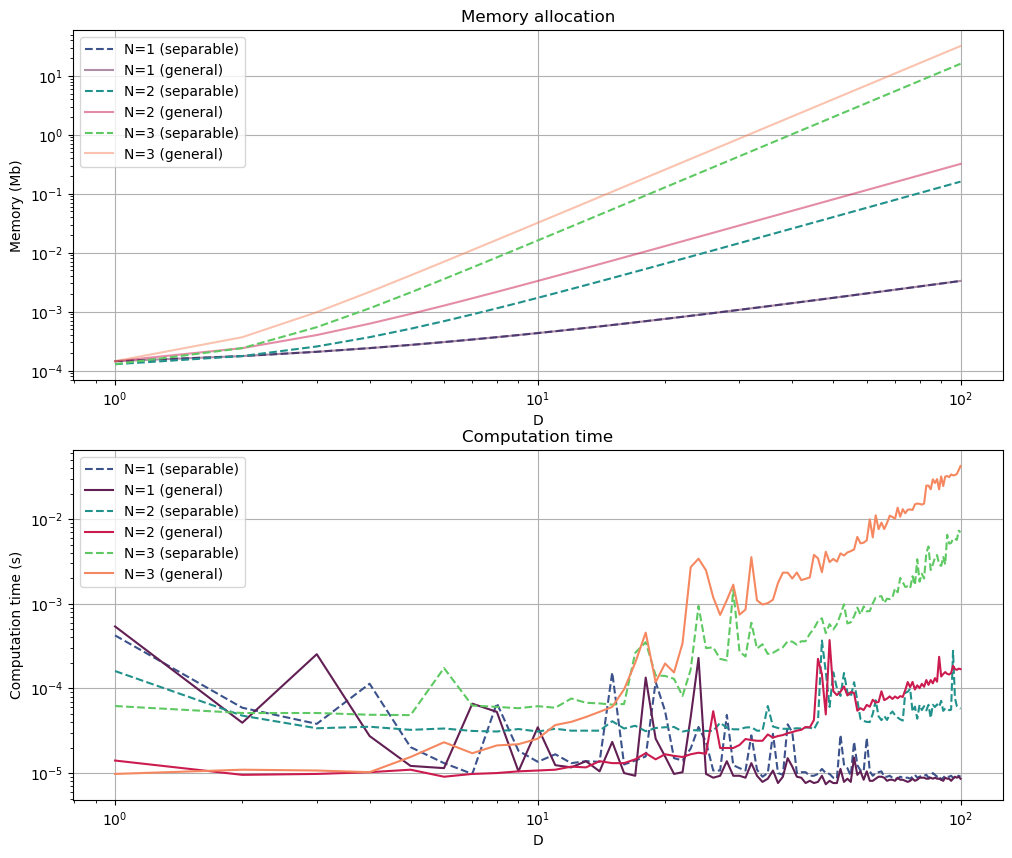

In [4]:
# parameters
rangeN = 3
rangeD = 100

sep_mems = np.zeros((rangeN,rangeD))
sep_times = np.zeros((rangeN,rangeD))
gen_mems = np.zeros((rangeN,rangeD))
gen_times = np.zeros((rangeN,rangeD))

for N in range(1,rangeN+1):
    for D in range(1,rangeD+1):
        _,sep_time, sep_mem = dm.separable_state(N,D,verb=2)
        _, gen_time, gen_mem = dm.general_state(N,D, verb=2)
        
        sep_mems[N-1,D-1] = sep_mem
        sep_times[N-1,D-1] = sep_time
        gen_mems[N-1,D-1] = gen_mem
        gen_times[N-1,D-1] = gen_time

print(sep_mems.shape)

# plots
D_space = np.arange(1,rangeD+1,1)
fig, ax = plt.subplots(2,1, figsize=(12,10))
# define a colormap based on the value of N
colors = sns.color_palette('viridis',rangeN+1)
for N in range(rangeN):
    ax[0].plot(D_space, sep_mems[N], label=f'N={N+1} (separable)', linestyle='--', color=sns.color_palette('viridis',rangeN)[N])
    ax[0].plot(D_space, gen_mems[N], label=f'N={N+1} (general)', color=sns.color_palette('rocket',rangeN)[N], alpha=0.5)
    ax[1].plot(D_space, sep_times[N], label=f'N={N+1} (separable)', linestyle='--', color=sns.color_palette('viridis',rangeN)[N])
    ax[1].plot(D_space, gen_times[N], label=f'N={N+1} (general)', color=sns.color_palette('rocket',rangeN)[N])
ax[0].set_title('Memory allocation')
ax[0].set_xlabel('D')
ax[0].set_ylabel('Memory (Mb)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].legend()

ax[1].set_title('Computation time')
ax[1].set_xlabel('D')
ax[1].set_ylabel('Computation time (s)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].grid()
ax[1].legend()

plt.show()

## Density matrix ##
### Random initialization ###

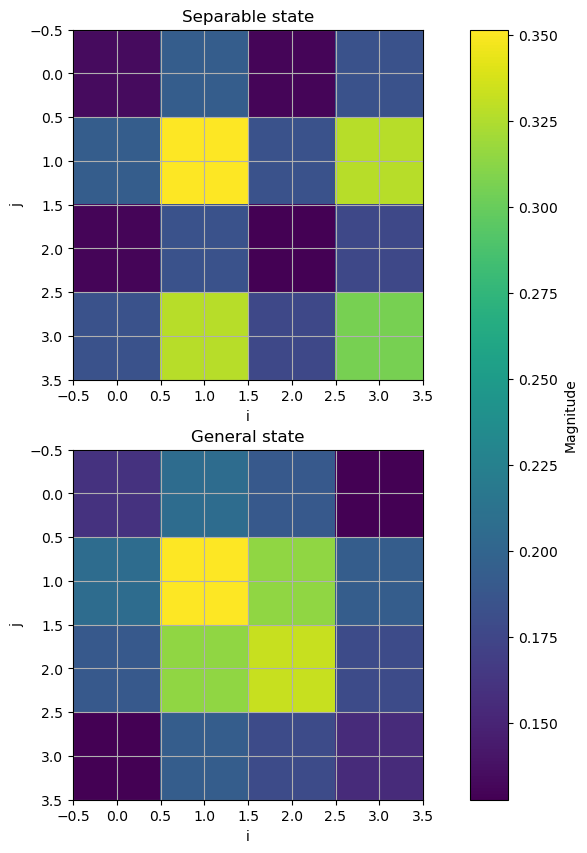

In [5]:
N = 4
D = 2

sep = dm.separable_state(N,D,verb=0)
gen = dm.general_state(N,D, verb=0)

# generate random indices to keep
#keep_indices = list(np.random.choice(range(D), size=int(D/2), replace=False))
keep_indices = [0,1]

sep_rdm = dm.rdm(sep,N,D,keep_indices)
gen_rdm = dm.rdm(gen,N,D,keep_indices)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
im0 = ax[0].imshow(np.abs(sep_rdm), cmap='viridis')
ax[0].set_title('Separable state')
ax[0].set_xlabel('i')
ax[0].set_ylabel('j')
ax[0].grid()

im1 = ax[1].imshow(np.abs(gen_rdm), cmap='viridis')
ax[1].set_title('General state')
ax[1].set_xlabel('i')
ax[1].set_ylabel('j')
ax[1].grid()

# Add colorbar
cbar = fig.colorbar(im1, ax=ax, orientation='vertical')
cbar.set_label('Magnitude')

plt.show()

### Known initialization ###

In [ ]:
# Set dimensions
N = 2
D = 2

# Define basis states
zero = np.array([1, 0])
one = np.array([0, 1])
plus = zero + one
minus = zero - one

# Build separable states
sep_1 = dm.separable_state(N, D, verb=0, input_state=np.array([zero, plus]))        # |0>|+>
sep_2 = dm.separable_state(N, D, verb=0, input_state=np.array([one, minus]))        # |1>|->
sep_3 = dm.separable_state(N, D, verb=0, input_state=np.array([plus, plus]))        # |+>|+>
sep_4 = dm.separable_state(N, D, verb=0, input_state=np.array([minus, minus]))      # |->|->

# Build general states (entangled)
gen_1 = dm.general_state(N, D, verb=0, input_state=(np.kron(zero, zero) + np.kron(one, one)))   # Bell state
gen_2 = dm.general_state(N, D, verb=0, input_state=(np.kron(zero, one) + np.kron(one, zero)))   # Bell state
gen_3 = dm.general_state(N, D, verb=0, input_state=(np.kron(zero, zero) + np.kron(one, one)))   # GHZ state
gen_4 = dm.general_state(N, D, verb=0, input_state=(np.kron(zero, zero) + np.kron(one, zero) + np.kron(one, one))) # Asymmetric state

# generate random matrices for each case and plot them as above as heatmaps

Separable states

In [7]:
dm.test_state(sep_1, N, D, expected_rdm_0=np.array([[1, 0], [0, 0]]), 
                           expected_rdm_1=np.array([[0.5, 0.5], [0.5, 0.5]]))

dm.test_state(sep_2, N, D, expected_rdm_0=np.array([[0, 0], [0, 1]]), 
                           expected_rdm_1=np.array([[0.5, -0.5], [-0.5, 0.5]]))

dm.test_state(sep_3, N, D, expected_rdm_0=np.array([[0.5, 0.5], [0.5, 0.5]]), 
                           expected_rdm_1=np.array([[0.5, 0.5], [0.5, 0.5]]))

dm.test_state(sep_4, N, D, expected_rdm_0=np.array([[0.5, -0.5], [-0.5, 0.5]]), 
                           expected_rdm_1=np.array([[0.5, -0.5], [-0.5, 0.5]]))


Testing state:
 [0.70710678 0.70710678 0.         0.        ]
Density matrix:
 [[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
Reduced density matrix (qubit 0):
 [[1. 0.]
 [0. 0.]]
Reduced density matrix (qubit 1):
 [[0.5 0.5]
 [0.5 0.5]]
Qubit 0 correct: True
Qubit 1 correct: True

Testing state:
 [ 0.         -0.          0.70710678 -0.70710678]
Density matrix:
 [[ 0.  -0.   0.  -0. ]
 [-0.   0.  -0.   0. ]
 [ 0.  -0.   0.5 -0.5]
 [-0.   0.  -0.5  0.5]]
Reduced density matrix (qubit 0):
 [[0. 0.]
 [0. 1.]]
Reduced density matrix (qubit 1):
 [[ 0.5 -0.5]
 [-0.5  0.5]]
Qubit 0 correct: True
Qubit 1 correct: True

Testing state:
 [0.5 0.5 0.5 0.5]
Density matrix:
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Reduced density matrix (qubit 0):
 [[0.5 0.5]
 [0.5 0.5]]
Reduced density matrix (qubit 1):
 [[0.5 0.5]
 [0.5 0.5]]
Qubit 0 correct: True
Qubit 1 correct: True

Testing state:
 [ 0.5 -0.5 -0.5  0.5]
Densit

General states

In [8]:
dm.test_state(gen_1, N, D, expected_rdm_0=np.array([[0.5, 0], [0, 0.5]]),
                           expected_rdm_1=np.array([[0.5, 0], [0, 0.5]]))

dm.test_state(gen_2, N, D, expected_rdm_0=np.array([[0.5, 0], [0, 0.5]]),
                           expected_rdm_1=np.array([[0.5, 0], [0, 0.5]]))

dm.test_state(gen_3, N, D, expected_rdm_0=np.array([[0.5, 0], [0, 0.5]]),
                           expected_rdm_1=np.array([[0.5, 0], [0, 0.5]]))

dm.test_state(gen_4, N, D, expected_rdm_0=np.array([[1/3, 1/3], [1/3, 2/3]]),
                           expected_rdm_1=np.array([[2/3, 1/3], [1/3, 1/3]]))


Testing state:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Density matrix:
 [[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]
Reduced density matrix (qubit 0):
 [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Reduced density matrix (qubit 1):
 [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Qubit 0 correct: True
Qubit 1 correct: True

Testing state:
 [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Density matrix:
 [[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]
Reduced density matrix (qubit 0):
 [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Reduced density matrix (qubit 1):
 [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Qubit 0 correct: True
Qubit 1 correct: True

Testing state:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Density matrix:
 [[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0